In [1]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.svm import SVC
import os
os. environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#TF_CPP_MIN_LOG_LEVEL: 텐서 플로우 로그
#0: 모든 로그 출력(default)
#1: INFO 로그 필터
#2: INFO, WARNING 로그 필터
#3: INFO, WARNING, ERROR 로그 필터

import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
# iris data 불러오기
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data[:100, :2], iris.target[:100], test_size = 0.6, random_state = 42)
#test_size: iris.data와 iris.target의 데이터 중 60%를 X_test와 y_test에 분배, 나머지 40%를 X_train과 y_train에 분배
#random_state: iris.data, iris.target의 데이터를 랜덤으로 믹스
# 즉, 데이터를 랜덤하게 섞은 후 test_size = 0.6에 맞춰서 분배

In [3]:
iris_x_Data = iris.data
iris_y_Data = iris.target

In [4]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
svm = svm.SVC(kernel = "linear", C = 10, gamma = 0.5)
#kernel: 선형 커널(linear kernel)
#C: 오류의 허용치(큼 -> 하드마진, 작음 -> 소프트 마진)
#gamma: 결정 경계의 유연함(C와 유사), 훈련 데이터에 민감하게 반응하는 정도

svm.fit(X_train, y_train) #train 데이터를 이용한 SVM 훈련
predictions = svm.predict(X_test) #훈련된 모델(svm.fit)을 이용한 test 데이터 예측
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'. format(score))

정확도: 1.000000


In [6]:
w = svm.coef_[0]
# b = svm.intercept_[0]
b = -17.457139460766456

print(f"w = {w}, b = {b}")

w = [ 3.85365198 -3.31708737], b = -17.457139460766456


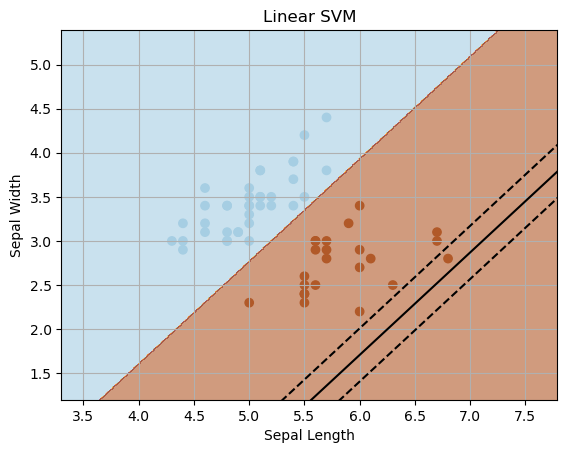

In [7]:
h = 0.01
x_min, x_max = X_test[:, 0].min()-1 , X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min()-1 , X_test[:, 1].max() + 1
#데이터가 그래프에 가려지지 안도록 그래프의 크기 조절

x_axis = np.linspace(x_min, x_max, 1000)
y_axis = -(w[0] / w[1]) * x_axis - b / w[1]
margin_up = -(w[0] / w[1]) * x_axis - (b - 1) / w[1]
margin_down = -(w[0] / w[1]) * x_axis - (b + 1) / w[1]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = np.c_[xx.ravel(), yy.ravel()]
                     
# Plot decision boundary of Linear SVM
Z_linear = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.plot(x_axis, y_axis, "k-")
plt.plot(x_axis, margin_up, "k--")
plt.plot(x_axis, margin_down, "k--")

plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()